In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Dragon Real Estate.csv')
print(df.shape)
df

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:>

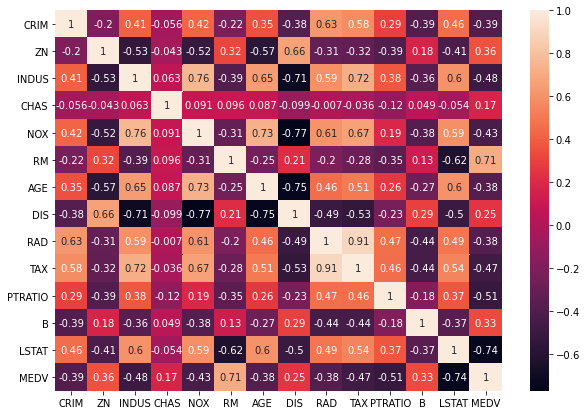

In [3]:
import seaborn as sns
cor=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor.round(3),annot=True)


In [4]:
df.dropna(inplace=True)

In [19]:
x=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [7]:
### Finding best Features

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

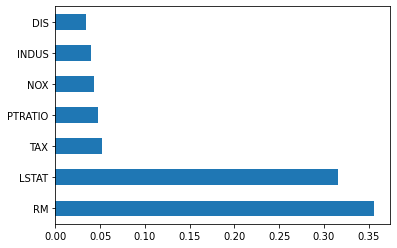

In [8]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

applying models

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model1=LinearRegression()
model2 = RandomForestRegressor()
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

RandomForestRegressor()

In [11]:
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)

Evaluation

In [12]:
# linear Regression
print("Residual sum of squares(MSE): %.2f"
      % np.mean((pred1 - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model1.score(X_test, y_test))

Residual sum of squares(MSE): 28.17
Variance score: 0.73


In [13]:
# Rabdom forest
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 2.678630000000002
MSE: 16.751561470000002
RMSE: 4.092867145412859


In [14]:
# RandomFroest_model

print("Residual sum of squares(MSE): %.2f"
      % np.mean((pred2 - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model2.score(X_test, y_test))

Residual sum of squares(MSE): 16.75
Variance score: 0.84


Cross validation

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,X_train,y_train,scoring = "neg_mean_squared_error",cv = 25)
rmse_score2 = np.sqrt(-scores)

In [16]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [17]:
print_scores(rmse_score2)

Scores: [2.88786606 3.97237178 2.88899099 3.10615583 3.61029401 2.38518473
 2.56221611 2.03135404 2.94186611 2.64549484 2.28842195 2.67613485
 2.28788084 2.89383959 3.24859034 2.99649118 2.44578768 1.84420645
 6.11973334 2.72907797 2.63003866 3.21252995 4.08954496 2.30939481
 2.52299148]
Mean: 2.9330583419411145
Standard deviation: 0.8388867481785828


In [18]:
np.sqrt(0.8570416361608663)

0.9257654325804492